In [1]:
import requests
from requests.exceptions import RequestException
import pandas as pd

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
url = "https://kam-backend-5.onrender.com/exports"
response = requests.get(url)
response.raise_for_status()
data = response.json()
df = pd.DataFrame(data)
df.head()

,COUNTRYNAME,DESTINATION,FOB_VALUE,HS CODE,Month,QUANTITY,SHORT_DESC,UNIT,Year,id
0,Burundi,BI,963497.85,2523.29.00,1,81000.0,Portland cement,kg,2022,1
1,Congo,CG,1040736.36,2523.29.00,1,112000.0,Portland cement,kg,2022,2
2,United Kingdom,GB,56.81,4819.10.00,1,1.0,Cartons,kg,2022,3
3,United Kingdom,GB,56.81,4819.30.00,1,0.5,Paper and bags,kg,2022,4
4,Rwanda,RW,44442973.91,2523.29.00,1,4824000.0,Portland cement,kg,2022,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   COUNTRYNAME  733 non-null    object 
 1   DESTINATION  733 non-null    object 
 2   FOB_VALUE    733 non-null    float64
 3   HS CODE      733 non-null    object 
 4   Month        733 non-null    int64  
 5   QUANTITY     733 non-null    float64
 6   SHORT_DESC   733 non-null    object 
 7   UNIT         564 non-null    object 
 8   Year         733 non-null    int64  
 9   id           733 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 57.4+ KB


In [4]:
# Function to load and examine the data
def load_and_examine_data(url):
    try:
        # Fetch data from the URL
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful
        
        # Convert the JSON data to a pandas DataFrame
        data = response.json()
        df = pd.DataFrame(data)
        
        # Set 'Year' as index if it exists in the data
        if 'Year' in df.columns:
            df = df.set_index('Year')
        
        # Display the shape, columns, and the first few rows of the dataset
        print("----------------------------Details about the data----------------------------\n")
        display(df.info)
        print("----------------------------Shape of the dataset----------------------------\n")
        display(df.shape)
        print("----------------------------Columns of the dataset----------------------------\n")
        display(df.columns)
        print("----------------------------Head of the dataset----------------------------\n")
        display(df.head())
    
        # Display information about the dataset
        print("\n----------------------------Data information ----------------------------\n")
        display(df.info())
        print("\n----------------------------Descriptive Statistics of the dataset ----------------------------\n")
        display(df.describe())
        
        return df

    except requests.exceptions.RequestException as e:
        print(f"An error occurred while fetching data: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Replace with your data URL
url = "https://kam-backend-5.onrender.com/exports" 
df = load_and_examine_data(url)

----------------------------Details about the data----------------------------



<bound method DataFrame.info of          COUNTRYNAME DESTINATION     FOB_VALUE     HS CODE  Month    QUANTITY  \
Year                                                                            
2022         Burundi          BI  9.634978e+05  2523.29.00      1    81000.00   
2022           Congo          CG  1.040736e+06  2523.29.00      1   112000.00   
2022  United Kingdom          GB  5.681000e+01  4819.10.00      1        1.00   
2022  United Kingdom          GB  5.681000e+01  4819.30.00      1        0.50   
2022          Rwanda          RW  4.444297e+07  2523.29.00      1  4824000.00   
...              ...         ...           ...         ...    ...         ...   
2024          Uganda          UG  1.103165e+07  7216.61.00      3    45897.00   
2024          Uganda          UG  3.918041e+06  7217.20.00      3    28000.00   
2024    South Africa          ZA  8.096443e+04  4819.10.00      3      272.55   
2024          Zambia          ZM  4.832235e+05  4819.10.00      3      257.83

----------------------------Shape of the dataset----------------------------



(733, 9)

----------------------------Columns of the dataset----------------------------



Index(['COUNTRYNAME', 'DESTINATION', 'FOB_VALUE', 'HS CODE', 'Month',
       'QUANTITY', 'SHORT_DESC', 'UNIT', 'id'],
      dtype='object')

----------------------------Head of the dataset----------------------------



,COUNTRYNAME,DESTINATION,FOB_VALUE,HS CODE,Month,QUANTITY,SHORT_DESC,UNIT,id
Year,,,,,,,,,
2022,Burundi,BI,963497.85,2523.29.00,1,81000.0,Portland cement,kg,1
2022,Congo,CG,1040736.36,2523.29.00,1,112000.0,Portland cement,kg,2
2022,United Kingdom,GB,56.81,4819.10.00,1,1.0,Cartons,kg,3
2022,United Kingdom,GB,56.81,4819.30.00,1,0.5,Paper and bags,kg,4
2022,Rwanda,RW,44442973.91,2523.29.00,1,4824000.0,Portland cement,kg,5



----------------------------Data information ----------------------------

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 2022 to 2024
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   COUNTRYNAME  733 non-null    object 
 1   DESTINATION  733 non-null    object 
 2   FOB_VALUE    733 non-null    float64
 3   HS CODE      733 non-null    object 
 4   Month        733 non-null    int64  
 5   QUANTITY     733 non-null    float64
 6   SHORT_DESC   733 non-null    object 
 7   UNIT         564 non-null    object 
 8   id           733 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 57.3+ KB


None


----------------------------Descriptive Statistics of the dataset ----------------------------



,FOB_VALUE,Month,QUANTITY,id
count,7.330000e+02,733.000000,7.330000e+02,733.000000
mean,2.222389e+07,6.166439,1.163605e+06,367.000000
std,5.003955e+07,3.492321,3.649003e+06,211.743162
min,4.690000e+00,1.000000,5.000000e-01,1.000000
25%,4.060000e+05,3.000000,1.840000e+03,184.000000
50%,5.034400e+06,6.000000,2.466000e+04,367.000000
75%,1.890641e+07,9.000000,1.146058e+05,550.000000
max,4.874803e+08,12.000000,3.763700e+07,733.000000


## Data Preparation

In [5]:
#dropping ID,destination and unit columns
columns_to_drop = ['id', 'DESTINATION','UNIT']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [6]:
df.head()

,COUNTRYNAME,FOB_VALUE,HS CODE,Month,QUANTITY,SHORT_DESC
Year,,,,,,
2022,Burundi,963497.85,2523.29.00,1,81000.0,Portland cement
2022,Congo,1040736.36,2523.29.00,1,112000.0,Portland cement
2022,United Kingdom,56.81,4819.10.00,1,1.0,Cartons
2022,United Kingdom,56.81,4819.30.00,1,0.5,Paper and bags
2022,Rwanda,44442973.91,2523.29.00,1,4824000.0,Portland cement


In [7]:
#converting HS CODE TO float
df['HS CODE'] = pd.to_numeric(df['HS CODE'], errors='coerce')

# Check the data type after conversion
print(df['HS CODE'].dtype)


float64


## EDA

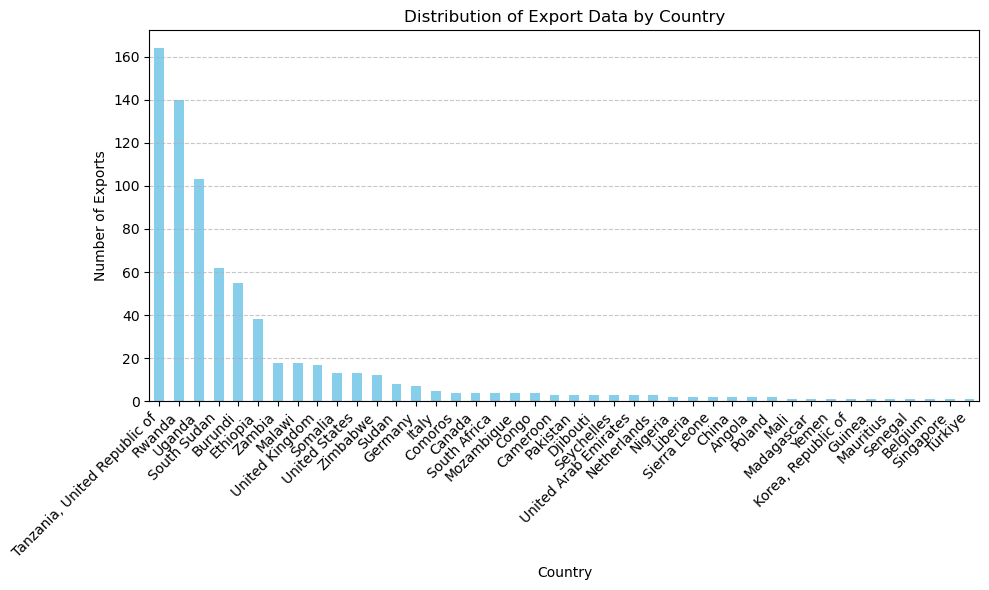

In [17]:
#Univariate analysis 
import matplotlib.pyplot as plt


# Count the occurrences of each country
country_counts = df['COUNTRYNAME'].value_counts()
        
# Plot the distribution of country names
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Export Data by Country')
plt.xlabel('Country')
plt.ylabel('Number of Exports')
plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Show the plot
plt.tight_layout()
plt.show()
        
    


In [18]:
country_counts = df['COUNTRYNAME'].value_counts()
       
# Print the frequencies
print("Frequency of Each Country:")
print(country_counts)

Frequency of Each Country:
COUNTRYNAME
Tanzania, United Republic of    164
Rwanda                          140
Uganda                          103
South Sudan                      62
Burundi                          55
Ethiopia                         38
Zambia                           18
Malawi                           18
United Kingdom                   17
Somalia                          13
United States                    13
Zimbabwe                         12
Sudan                             8
Germany                           7
Italy                             5
Comoros                           4
Canada                            4
South Africa                      4
Mozambique                        4
Congo                             4
Cameroon                          3
Pakistan                          3
Djibouti                          3
Seychelles                        3
United Arab Emirates              3
Netherlands                       3
Nigeria                  

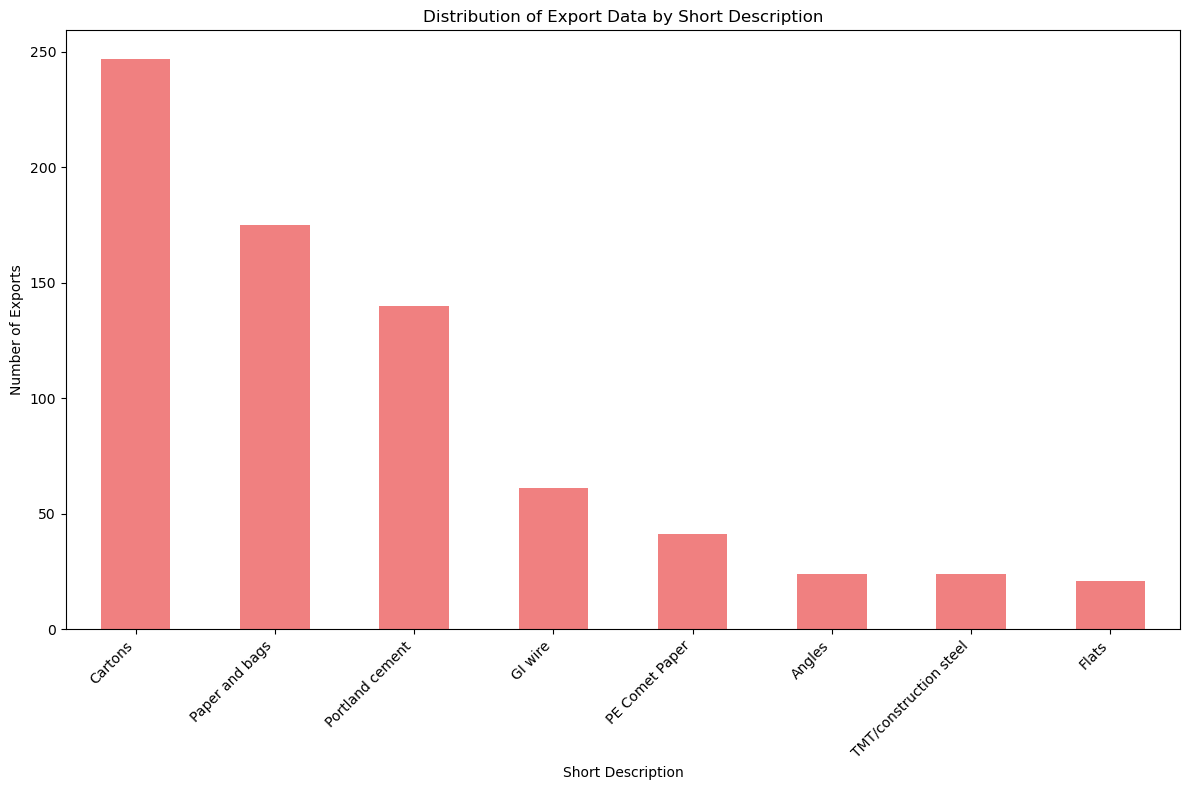

In [19]:
# Count the occurrences of each short description
short_desc_counts = df['SHORT_DESC'].value_counts()
        
        # Plot the distribution of short descriptions
plt.figure(figsize=(12, 8))
short_desc_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Export Data by Short Description')
plt.xlabel('Short Description')
plt.ylabel('Number of Exports')
plt.xticks(rotation=45, ha='right')  # Rotate short descriptions for better readabilityplt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Show the plot
plt.tight_layout()
plt.show()

In [20]:
# Count the occurrences of each short description
short_desc_counts = df['SHORT_DESC'].value_counts()
# Print the frequencies
print("Frequency of Each Short Description:")
print(short_desc_counts)

Frequency of Each Short Description:
SHORT_DESC
Cartons                   247
Paper and bags            175
Portland cement           140
GI wire                    61
PE Comet Paper             41
Angles                     24
TMT/construction steel     24
Flats                      21
Name: count, dtype: int64


## Bivariate 

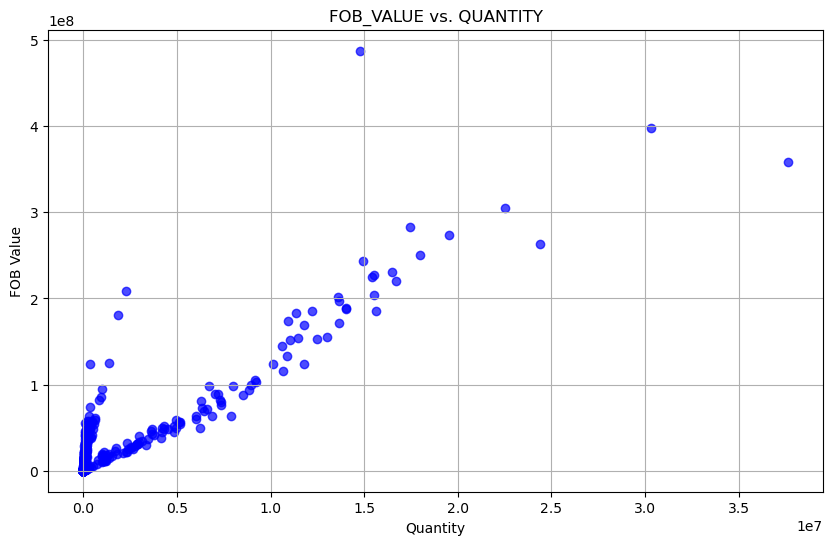

In [27]:
#FOB_VALUE vs. QUANTITY
def plot_fob_value_vs_quantity(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['QUANTITY'], df['FOB_VALUE'], alpha=0.7, color='blue')
    plt.title('FOB_VALUE vs. QUANTITY')
    plt.xlabel('Quantity')
    plt.ylabel('FOB Value')
    plt.grid(True)
    plt.show()

plot_fob_value_vs_quantity(df)


<Figure size 1200x800 with 0 Axes>

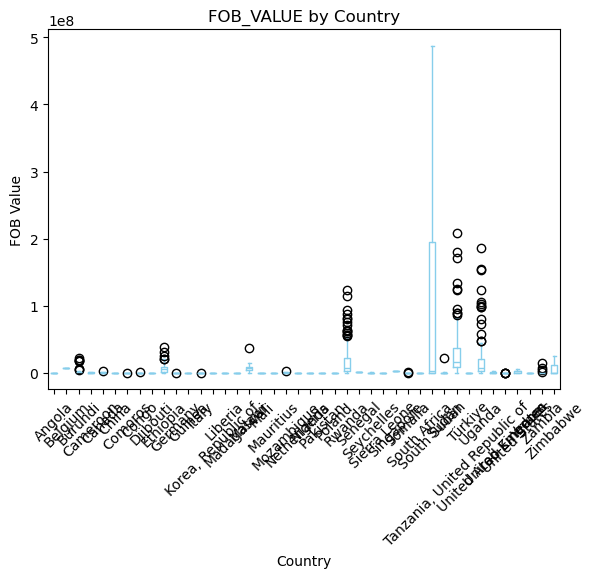

In [28]:
# FOB_VALUE vs. COUNTRYNAME
def plot_fob_value_by_country(df):
    plt.figure(figsize=(12, 8))
    df.boxplot(column='FOB_VALUE', by='COUNTRYNAME', rot=45, grid=False, color='skyblue')
    plt.title('FOB_VALUE by Country')
    plt.suptitle('')
    plt.xlabel('Country')
    plt.ylabel('FOB Value')
    plt.show()

plot_fob_value_by_country(df)


In [8]:
#Analyzing  trends over months (changes in FOB_VALUE and QUANTITY over different months).
import matplotlib.pyplot as plt


C:\Users\HP\AppData\Local\Temp\ipykernel_20920\1449061508.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trends = df.groupby('Month').agg({


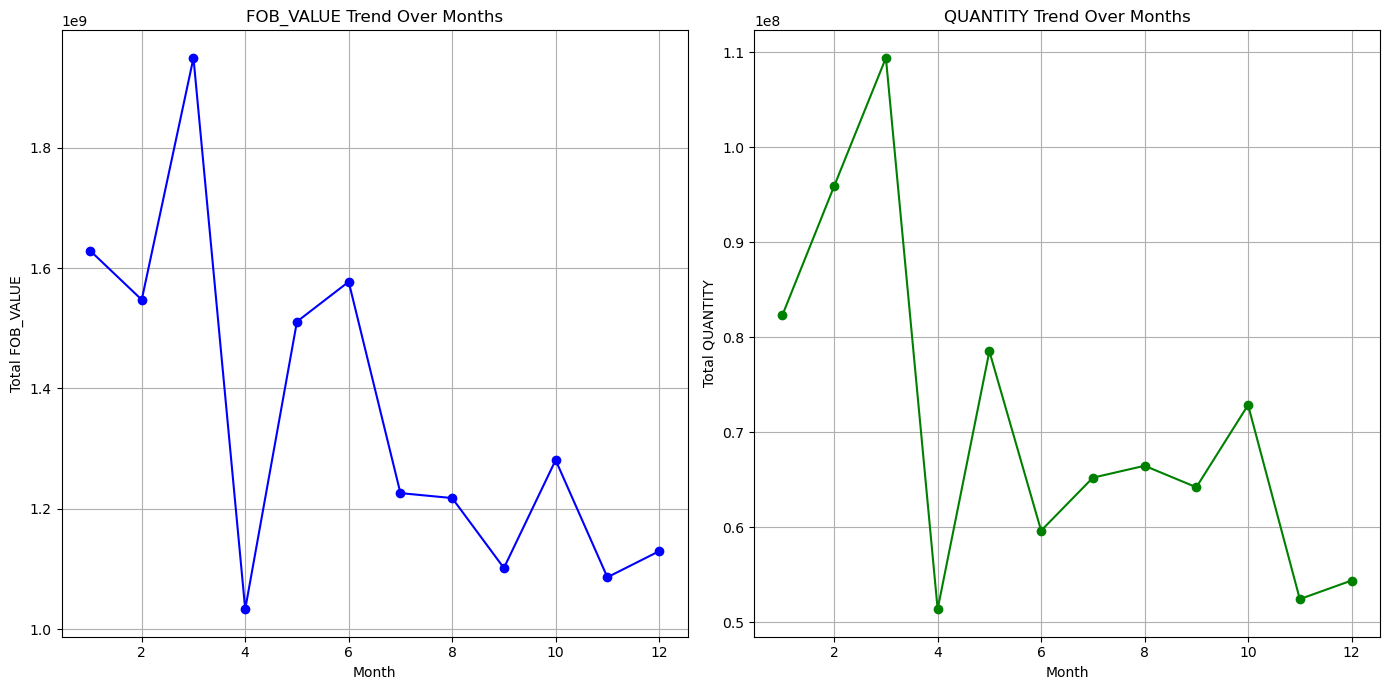

In [9]:
df['Month'] = pd.Categorical(df['Month'], categories=list(range(1, 13)), ordered=True)
        
        # Group by 'Month' and aggregate the sum of 'FOB_VALUE' and 'QUANTITY'
monthly_trends = df.groupby('Month').agg({
            'FOB_VALUE': 'sum',
            'QUANTITY': 'sum'
        }).reset_index()
        
        # Plot the trends
plt.figure(figsize=(14, 7))
        
        # Plot FOB_VALUE trend
plt.subplot(1, 2, 1)
plt.plot(monthly_trends['Month'], monthly_trends['FOB_VALUE'], marker='o', linestyle='-', color='b')
plt.title('FOB_VALUE Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Total FOB_VALUE')
plt.grid(True)
        
        # Plot QUANTITY trend
plt.subplot(1, 2, 2)
plt.plot(monthly_trends['Month'], monthly_trends['QUANTITY'], marker='o', linestyle='-', color='g')
plt.title('QUANTITY Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Total QUANTITY')
plt.grid(True)
        
        # Display the plots
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20920\475137226.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_monthly_trends = df.groupby(['Year', 'Month']).agg({


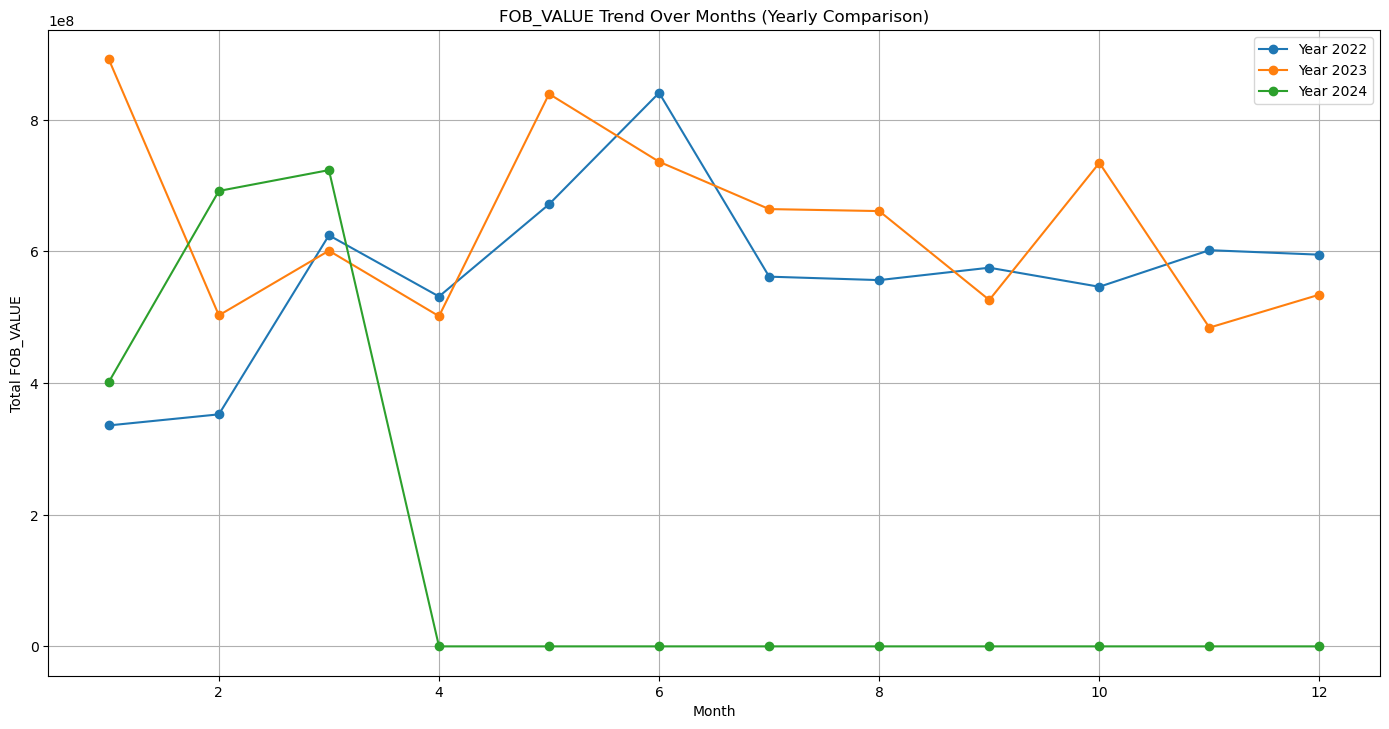

In [10]:
# Ensure 'Month' is treated as a categorical variable in orde
df['Month'] = pd.Categorical(df['Month'], categories=list(range(1, 13)), ordered=True)
# Group by 'Year' and 'Month', then aggregate the sum of 'FOB_VALUE' and 'QUANTITY'
yearly_monthly_trends = df.groupby(['Year', 'Month']).agg({
            'FOB_VALUE': 'sum',
            'QUANTITY': 'sum'
        }).reset_index()
        
# Plot the trends with yearly comparison
plt.figure(figsize=(14, 14))
        
# Plot FOB_VALUE trend
plt.subplot(2, 1, 1)
for year in yearly_monthly_trends['Year'].unique():
            subset = yearly_monthly_trends[yearly_monthly_trends['Year'] == year]
            plt.plot(subset['Month'], subset['FOB_VALUE'], marker='o', linestyle='-', label=f'Year {year}')
plt.title('FOB_VALUE Trend Over Months (Yearly Comparison)')
plt.xlabel('Month')
plt.ylabel('Total FOB_VALUE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
        


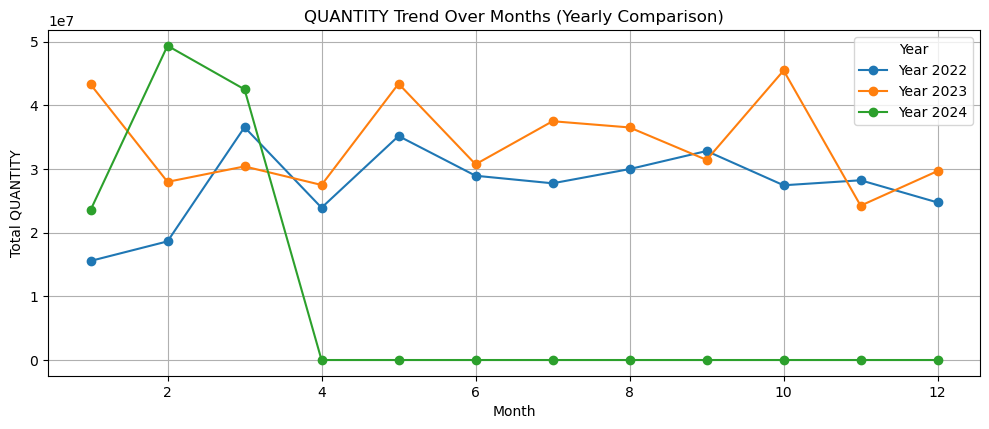

In [11]:

# Create a new figure and subplots
plt.figure(figsize=(10, 8))

# Subplot 2: QUANTITY Trend Over Months (Yearly Comparison)
plt.subplot(2, 1, 2)

# Loop through each unique year and plot the trends
for year in yearly_monthly_trends['Year'].unique():
    subset = yearly_monthly_trends[yearly_monthly_trends['Year'] == year]
    plt.plot(subset['Month'], subset['QUANTITY'], marker='o', linestyle='-', label=f'Year {year}')

# Add titles and labels
plt.title('QUANTITY Trend Over Months (Yearly Comparison)')
plt.xlabel('Month')
plt.ylabel('Total QUANTITY')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()
